In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
tf.test.gpu_device_name()

C:\Users\ICT01_20\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_20\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_20\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_20\Anaconda3\envs\tf_test\lib\site-packages

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6130053039143615263
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1410301542
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13439858167487942929
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


'/device:GPU:0'

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [3]:
# channel_first
#x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
#x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)

# channel_last
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# 타입 변경
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
model = Sequential()
# output filter의 개수, filter size
# 28 x 28(input filter) -> (128, 26, 26, 32) # 26 = (28-3+1)
# valid, same(28, 28) : 모서리 특징
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation="relu"))
# 128, 24, 24, 64
model.add(MaxPooling2D(pool_size=(2,2))) # 128, 12, 12, 64
model.add(Dropout(0.25))
model.add(Flatten()) # 12 x 12 x 64 =>1차원 9216
# FFNN, FC(Fully-connected)
model.add(Dense(128, activation="relu")) # 9216 x 128
# 128 x 128
model.add(Dropout(0.5)) # 계산회로만 생략
model.add(Dense(10, activation="softmax")) # 128 x 10






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 196us/step - loss: 0.2742 - acc: 0.9160 - val_loss: 0.0574 - val_acc: 0.9818
Epoch 2/12
60000/60000 [==============================] - 10s 164us/step - loss: 0.0871 - acc: 0.9735 - val_loss: 0.0427 - val_acc: 0.9849
Epoch 3/12
60000/60000 [==============================] - 10s 163us/step - loss: 0.0663 - acc: 0.9801 - val_loss: 0.0395 - val_acc: 0.9861
Epoch 4/12
60000/60000 [==============================] - 10s 162us/step - loss: 0.0545 - acc: 0.9839 - val_loss: 0.0336 - val_acc: 0.9896
Epoch 5/12
60000/60000 [==============================] - 10s 165us/step - loss: 0.0476 - acc: 0.9858 - val_loss: 0.0285 - val_acc: 0.9905
Epoch 6/12
60000/60000 [==============================] - 10s 163us/step - loss: 0.0426 - acc: 0.9870 - val_loss: 0.0311 - val_acc: 0.9900
Epoch 7/12
60000/600

In [7]:
# train, validation, test
# epoch마다 accuracy를 저장한다.
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []
    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get("accuracy"))
        
history = AccuracyHistory()  # 인스턴스 해주고 아래 fit에 , callbacks에  history 지정한다.

model.fit(x_train, y_train,
         batch_size=batch_size, epochs=epochs, verbose=1,
         validation_data=(x_test, y_test), callbacks=[history])
score = model.evaluate(x_test, verbose=0)
plt.plot(range(1, 11), history.acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 163us/step - loss: 0.0175 - acc: 0.9947 - val_loss: 0.0305 - val_acc: 0.9915
Epoch 2/12
60000/60000 [==============================] - 10s 164us/step - loss: 0.0167 - acc: 0.9948 - val_loss: 0.0293 - val_acc: 0.9920
Epoch 3/12
60000/60000 [==============================] - 10s 164us/step - loss: 0.0167 - acc: 0.9948 - val_loss: 0.0285 - val_acc: 0.9923
Epoch 4/12
60000/60000 [==============================] - 10s 167us/step - loss: 0.0166 - acc: 0.9948 - val_loss: 0.0301 - val_acc: 0.9916
Epoch 5/12
60000/60000 [==============================] - 10s 165us/step - loss: 0.0146 - acc: 0.9954 - val_loss: 0.0331 - val_acc: 0.9926
Epoch 6/12
60000/60000 [==============================] - 10s 165us/step - loss: 0.0166 - acc: 0.9949 - val_loss: 0.0282 - val_acc: 0.9924
Epoch 7/12
60000/60000 [==============================] - 10s 163us/step - loss: 0.0157 - acc: 0.9951 - val_loss: 0.

IndexError: list index out of range

In [8]:
# HDFS(Hadoop File System) : 모델 구조 전체 저장
# 가중치, 구조, Optimization statge 등이 저장
# json으로 저장 -> 구조와 가중치를 별도로 저장
model.save("model_mnist.h5")
print("모델이 저장되었습니다.")

from keras.models import load_model

model = load_model("model_mnist.h5")
print("모델이 로딩되었습니다.")
model.summary()

모델이 저장되었습니다.
모델이 로딩되었습니다.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)          

In [9]:
# 레이어 정보 확인
l1 = model.layers[0]
l2 = model.layers[1]
print(l1.name)
print(l1.input_shape)
print(l1.activation)
print(l1.output_shape)

conv2d_1
(None, 28, 28, 1)
<function relu at 0x00000192803193A8>
(None, 26, 26, 32)


C:\Users\ICT01_20\Anaconda3\envs\tf_test\lib\site-packages\keras_preprocessing\image\image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


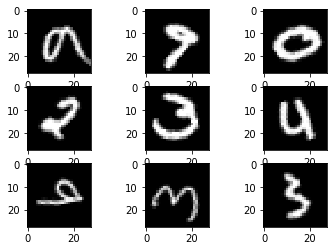

In [10]:
# imageDataGenerator
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
#datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
#datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)

# 이미지 백색화 => noise 제거(변수 간 상관도를 없앰 : PCA)
datagen = ImageDataGenerator(zca_whitening=True)
datagen = ImageDataGenerator(rotation_range=90)
datagen.fit(X_train)
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9,
                                     save_to_dir="images",
                                     save_prefix="aug",
                                     save_format="png"):
    
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28),
                     cmap=pyplot.get_cmap("gray"))
    pyplot.show()
    break

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


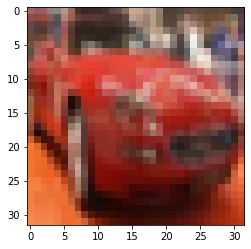

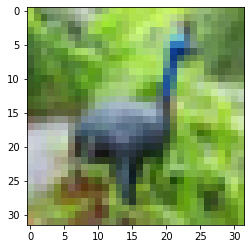

In [11]:
import keras
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import Sequential
from keras.datasets import cifar10
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from keras.layers import Activation
import matplotlib.pyplot as plt
%matplotlib inline

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print("X_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")
NB_CLASSES = 10
Y_train = np_utils.to_categorical(Y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(Y_test, NB_CLASSES)

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

plt.imshow(X_train[5])
plt.grid(False)
plt.show()
plt.imshow(X_train[6])
plt.grid(False)
plt.show()

In [12]:
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32
BATCH_SIZE = 128
NB_EPOCH = 40
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [13]:
model = Sequential()
# residual망의 영향
# 32 x 32 x 3 => 32x32x32
model.add(Conv2D(32, kernel_size=3, padding="same", input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation("relu"))
model.add(Conv2D(32, kernel_size=3, padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [14]:
model.add(Conv2D(64, kernel_size=3, padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(64, 3, 3))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

C:\Users\ICT01_20\Anaconda3\envs\tf_test\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation("softmax"))
model.summary()
model.compile(loss="categorical_crossentropy", optimizer=OPTIM, metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
__________

In [16]:
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
                    epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT, verbose=VERBOSE)

Train on 40000 samples, validate on 10000 samples
Epoch 1/40
40000/40000 [==============================] - 10s 262us/step - loss: 1.7553 - acc: 0.3656 - val_loss: 1.4083 - val_acc: 0.4948
Epoch 2/40
40000/40000 [==============================] - 10s 243us/step - loss: 1.3403 - acc: 0.5224 - val_loss: 1.2427 - val_acc: 0.5553
Epoch 3/40
40000/40000 [==============================] - 10s 242us/step - loss: 1.1515 - acc: 0.5926 - val_loss: 1.0291 - val_acc: 0.6401
Epoch 4/40
40000/40000 [==============================] - 10s 242us/step - loss: 1.0157 - acc: 0.6418 - val_loss: 0.9242 - val_acc: 0.6795
Epoch 5/40
40000/40000 [==============================] - 10s 245us/step - loss: 0.9215 - acc: 0.6776 - val_loss: 0.9100 - val_acc: 0.6825
Epoch 6/40
40000/40000 [==============================] - 10s 242us/step - loss: 0.8444 - acc: 0.7060 - val_loss: 0.8204 - val_acc: 0.7108
Epoch 7/40
40000/40000 [==============================] - 10s 246us/step - loss: 0.7819 - acc: 0.7243 - val_loss: 0.

In [17]:
datagen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                             zca_whitening=False, # 이미지 PCA 노이즈 제거
                             rotation_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True,
                             vertical_flip=False)
datagen.fit(X_train)

In [18]:
model.fit_generator(datagen.flow(X_test, Y_test,
                                 batch_size=BATCH_SIZE),
                    samples_per_epoch=X_train.shape[0],
                    nb_epoch=NB_EPOCH,
                    verbose=VERBOSE)

Epoch 1/40
  2/390 [..............................] - ETA: 21s - loss: 1.2094 - acc: 0.5859

C:\Users\ICT01_20\Anaconda3\envs\tf_test\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
C:\Users\ICT01_20\Anaconda3\envs\tf_test\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., verbose=1, steps_per_epoch=390, epochs=40)`
  """


390/390 [==============================] - 17s 43ms/step - loss: 1.0617 - acc: 0.6546
Epoch 2/40
390/390 [==============================] - 17s 43ms/step - loss: 0.9953 - acc: 0.6703
Epoch 3/40
390/390 [==============================] - 17s 44ms/step - loss: 0.9530 - acc: 0.6859
Epoch 4/40
390/390 [==============================] - 17s 44ms/step - loss: 0.9235 - acc: 0.6925
Epoch 5/40
390/390 [==============================] - 18s 47ms/step - loss: 0.9115 - acc: 0.6974
Epoch 6/40
390/390 [==============================] - 17s 43ms/step - loss: 0.8924 - acc: 0.7055
Epoch 7/40
390/390 [==============================] - 16s 42ms/step - loss: 0.8827 - acc: 0.7086
Epoch 8/40
390/390 [==============================] - 16s 42ms/step - loss: 0.8798 - acc: 0.7102
Epoch 9/40
390/390 [==============================] - 17s 44ms/step - loss: 0.8707 - acc: 0.7121
Epoch 10/40
390/390 [==============================] - 17s 44ms/step - loss: 0.8580 - acc: 0.7184
Epoch 11/40
390/390 [===================

In [19]:
score = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print("\nTest accuracy:", score[1])

10000/10000 [==============================] - 1s 83us/step

Test score: 0.6849387546539306

Test accuracy: 0.7715


In [20]:
# json
model_json = model.to_json()
open("cifar10_architecture.json", "w").write(model_json)
model.save_weights("cifar10_weights.h5", overwrite=True)

In [21]:
from keras.models import model_from_json
json_file = open("cifar10_architecture.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("cifar10_weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [23]:
# accuracy graph를 출력해보시요.
# 이미지 cat, dog를 다운로드한 다음 위의 모델로 예측해보시요.
import numpy as np
from imageio import imread
from skimage.transform import resize
from keras.models import model_from_json
img_names = ['cat.jpg','dog.jpg']
imgs = [resize(imread(img_name), (32,32)).astype('float32')
       for img_name in img_names]
imgs = np.array(imgs) / 255
predictions = model.predict_classes(imgs)
print(predictions)

[4 4]


In [ ]:
# 전이학습(transfer learning) application
- 반지도학습(일부데이터의 라벨이 무) : knn , Trenductive SVM 
- 가중치 활용 : 그대로만 적용 
- 가중치 중 일부분만 활용
- ffnn 부분만 학습해서 사용 

PIL image size (224, 224)


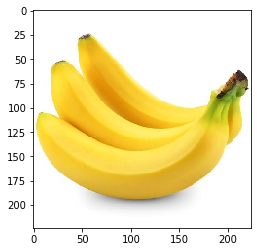

numpy array size (224, 224, 3)
image array size (1, 224, 224, 3)

40960/35363 [==================================] - 0s 1us/step
[[('n07753592', 'banana', 0.99930274), ('n07749582', 'lemon', 0.00014120771), ('n07716358', 'zucchini', 0.0001349399), ('n07720875', 'bell_pepper', 7.893179e-05), ('n07747607', 'orange', 7.7046665e-05)]]


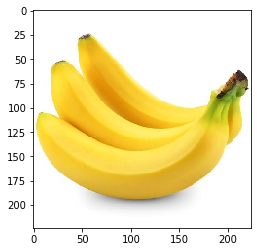

In [28]:
import PIL
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.imagenet_utils import decode_predictions
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.applications import resnet50
filename = 'banana.jpg'
original = load_img(filename, target_size=(224,224))
print('PIL image size', original.size)
# 차원 확대 : 여러장 처리
# 1장 ( 3차원 - > 4차원으로 확장)
plt.imshow(original)
plt.show()
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
print('numpy array size' , numpy_image.shape)
image_batch=np.expand_dims(numpy_image, axis=0)
print('image array size' , image_batch.shape)
#prepare the image for the resnet50 model
precessed_image = resnet50.preprocess_input(image_batch.copy())
# dense 을 이용해서 모델을 생성
# 라벨 =-> 확률 : 1
resnet_model = resnet50.ResNet50(weights = 'imagenet')
# softmax 확률 (상위 3개 예측)
predictions = resnet_model.predict(precessed_image)
label = decode_predictions(predictions)
print(label)

In [29]:
label = decode_predictions(predictions , top = 3)
print(label)

[[('n07753592', 'banana', 0.99930274), ('n07749582', 'lemon', 0.00014120771), ('n07716358', 'zucchini', 0.0001349399)]]


In [1]:
from numpy.random import randn
import pathlib
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from matplotlib.image import imread
from keras.preprocessing import image
#tf.enable_eager_execution()
AUTOTUNE = tf.data.experimental.AUTOTUNE
data_dir = 'C:/Users/ICT01_20/Desktop/전달/flowers/flower_photos'
data_dir = pathlib.Path(data_dir)
label_names ={'daisy':0,'dandelion':1,'roses':2,'sunflowers':3,'tulips':4}
label_key=['daisy','dandelion','roses','sunflowers','tulips']

C:\Users\ICT01_20\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_20\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_20\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_20\Anaconda3\envs\tf_test\lib\site-packages

In [2]:
all_images = list(data_dir.glob('*/*'))
all_images = [str(path) for path in all_images]
random.shuffle(all_images)
all_labels=[label_names[pathlib.Path(path).parent.name] for path in all_images]
data_size = len(all_images)
train_test_split=(int)(data_size*0.2)
x_train = all_images[train_test_split:]
x_test = all_images[:train_test_split]
y_train = all_labels[train_test_split:]
y_test = all_labels[:train_test_split]
img_size = 160
batch_size = 32

In [3]:
def _parse_data(x,y):
    image = tf.read_file(x)
    image = tf.image.decode_jpeg(image, channels= 3)
    image = tf.cast(image,tf.float32)
    image = (image/127.5) -1 
    image = tf.image.resize(image, (img_size, img_size))
    return image,y 
def _input_fn(x,y):
    ds = tf.data.Dataset.from_tensor_slices((x,y))
    ds = ds.map(_parse_data)
    ds = ds.shuffle(buffer_size=data_size)
    ds = ds.repeat()
    ds = ds.batch(batch_size)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds
train_ds = _input_fn(x_train,y_train)
validation_ds = _input_fn(x_test, y_test)

In [4]:
IMG_SHAPE = (img_size,img_size,3)
VGG16_MODEL = tf.keras.applications.VGG16(input_shape = IMG_SHAPE,
                                         include_top=False,
                                         weights='imagenet')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
VGG16_MODEL.trainable =False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(len(label_names),activation='softmax')

In [6]:
model = tf.keras.Sequential([VGG16_MODEL, global_average_layer,prediction_layer])

In [7]:
model.compile(optimizer = 'Adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [8]:
history = model.fit(train_ds, epochs=100, steps_per_epoch=2)

Epoch 1/100


InvalidArgumentError: 2 root error(s) found.
  (0) Invalid argument: Invalid JPEG data or crop window, data size 2636
	 [[{{node DecodeJpeg}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_199]]
  (1) Invalid argument: Invalid JPEG data or crop window, data size 2636
	 [[{{node DecodeJpeg}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored.